If not explicitly mentioned otherwise we assume:
- RCP2.6 scenario or the lowest ppm concentration reported (stabilized around 400-420)
- Linear phase-out of fossil fuels from model start time (2000-2015) by 2100
- BAU scenario would lead to RCP6 or higher
- as it is widely accepcted that in order to obtain RCP2.6, emissions must at least cease or turn into removals in the geological near-term (throughout this century), therefore whenever the carbon price is given in terms of percentage reduction from current levels, a linear 100% reduction is assumed from model start time (2000-2015) by 2100
- if ranges are reported, the mean is taken
- if the model reports price in dollar per ton of carbon, it is converted to dollar per ton of carbon dioxide

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
%matplotlib inline
mpl.style.use('classic')

In [2]:
d=[]
#d.append(pd.read_csv('carbon/alberth_hope2006.csv',header=None))
#d.append(pd.read_csv('carbon/alberth_hope2006_2.csv',header=None))
d.append(pd.read_csv('carbon/bauer2012.csv',header=None))
d.append(pd.read_csv('carbon/bauer2012_2a.csv',header=None))
d.append(pd.read_csv('carbon/bauer2012_2b.csv',header=None))
d.append(pd.read_csv('carbon/bauer2012_2c.csv',header=None))
d.append(pd.read_csv('carbon/bosetti2014a.csv',header=None))
d.append(pd.read_csv('carbon/bosetti2014b.csv',header=None))
d.append(pd.read_csv('carbon/bosetti2014c.csv',header=None))
d.append(pd.read_csv('carbon/cai2015.csv',header=None))
d.append(pd.read_csv('carbon/chen2005.csv',header=None))
d.append(pd.read_csv('carbon/edmonds_GCAM1994.csv',header=None))
d.append(pd.read_csv('carbon/kriegler2015_2.csv',header=None))
#d.append(pd.read_csv('carbon/luderer_REMIND2015.csv',header=None))
d.append(pd.read_csv('carbon/manne_richels_MERGE2005.csv',header=None))
d.append(pd.read_csv('carbon/paltsev2005.csv',header=None))
d.append(pd.read_csv('carbon/russ_POLES2012.csv',header=None))
d.append(pd.read_csv('carbon/wilkerson2015.csv',header=None))

In [3]:
from scipy.interpolate import interp1d
kd=[]
fd=[]

In [4]:
for z in range(len(d)):
    kd.append({})
    for i in range(len(d[z][0])):
        if ~np.isnan(d[z][0][i]):
            kd[z][np.round(d[z][0][i],0)]=d[z][1][i]
    fd.append(interp1d(sorted(kd[z].keys()),[kd[z][j] for j in sorted(kd[z].keys())]))

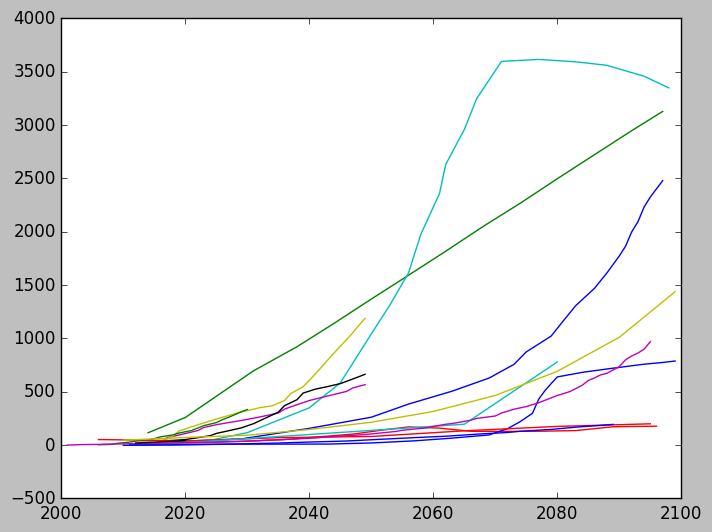

In [5]:
for z in range(len(d)):
    #plt.scatter(d[z][0],d[z][1])
    years=range(int(min(d[z][0]))+1,int(max(d[z][0]))+1)
    plt.plot(years,fd[z](years))

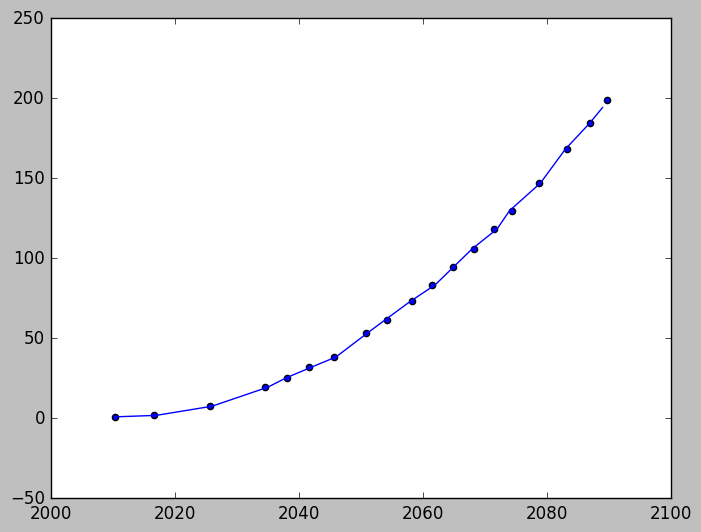

In [6]:
labels=['Bauer, Hilaire et al.\n2012 | REMIND-R',\
'Luderer, Bosetti et al.\n2011 | IMACLIM-R',\
'Luderer, Bosetti et al.\n2011 | REMIND-R',\
'Luderer, Bosetti et al.\n2011 | WITCH',\
'Bosetti, Marangoni et al.\n2015 | GCAM',\
'Bosetti, Marangoni et al.\n2015 | MARKAL US',\
'Bosetti, Marangoni et al.\n2015 | WITCH',\
'Cai, Newth et al.\n2015 | GTEM-C',\
'Chen, 2005\nMARKAL-MACRO',\
'Edmonds, Wise, MacCracken\n1994 | GCAM',\
'Kriegler, Petermann, et al.\n2015 | multiple',\
'Manne, Richels\n2005 | MERGE',\
'Paltsev, Reilly et al.\n2005 | MIT EPPA',\
'Russ, Ciscar et al.\n2009 | POLES',\
'Wilkerson, Leibowicz et al.\n2015 | multiple'\
]
co2=[1,1,1,1,0,0,0,1,0,0,1,0,0,0,1]
z=14
plt.scatter(d[z][0],d[z][1])
years=range(int(min(d[z][0]))+1,int(max(d[z][0]))+1)
plt.plot(years,fd[z](years))

In [7]:
def plotter(ax,x,y,c,l,z=2,zz=2,step=2,w=-50,w2=30):
    yrs=range(x[0]-40,x[len(x)-1]+10)
    maxi=[0,0]
    maxv=-100
    
    #try a few initial values for maximum rsquared
    i=0
    for k in range(1,5):
        p0 = [1., 1., x[len(x)*k/5]]
        fit2 = optimize.leastsq(errfunc,p0,args=(x,y),full_output=True)
        ss_err=(fit2[2]['fvec']**2).sum()
        ss_tot=((y-y.mean())**2).sum()
        rsquared=1-(ss_err/ss_tot)
        if rsquared>maxv:
            maxi=[i,k]
            maxv=rsquared

    i=maxi[0]
    k=maxi[1]
    
    p0 = [1., 1., x[len(x)*k/5], -1+i*0.5]
    fit2 = optimize.leastsq(errfunc,p0,args=(x,y),full_output=True)
    ss_err=(fit2[2]['fvec']**2).sum()
    ss_tot=((y-y.mean())**2).sum()
    rsquared=1-(ss_err/ss_tot)

    
    ax.scatter(x[::step],y[::step],lw*3,color=c)
    #ax.plot(yrs,logist(fit2[0],yrs),color="#006d2c",lw=lw)
    ax.plot(yrs,logist(fit2[0],yrs),color="#444444",lw=lw)
    #ax.plot(yrs,logist(fit2[0],yrs),color=c,lw=1)
    
    yk=logist([fit2[0][0],fit2[0][1],fit2[0][2],fit2[0][3]],range(3000))
    mint=0
    maxt=3000
    perc=0.1
    for i in range(3000):
        if yk[i]<perc: mint=i
        if yk[i]<1-perc: maxt=i
    
    if z>-1:
        coord=len(x)*z/5
        ax.annotate('$R^2 = '+str(np.round(rsquared,2))+'$\n'+\
                    '$\\alpha = '+str(np.round(fit2[0][0],2))+'$\n'+\
                    '$\\beta = '+str(np.round(fit2[0][1],2))+'$\n'+\
                    '$\\Delta t = '+str(int(maxt-mint))+'$', xy=(yrs[coord], logist(fit2[0],yrs)[coord]),\
                    xycoords='data', 
                    xytext=(w, w2), textcoords='offset points', color="#444444",
                    arrowprops=dict(arrowstyle="->",color='#444444'))  
    
    coord=len(x)*zz/5
    ax.annotate(l, xy=(yrs[coord], logist(fit2[0],yrs)[coord]),\
                    xycoords='data', 
                    xytext=(w, w2), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->"))  

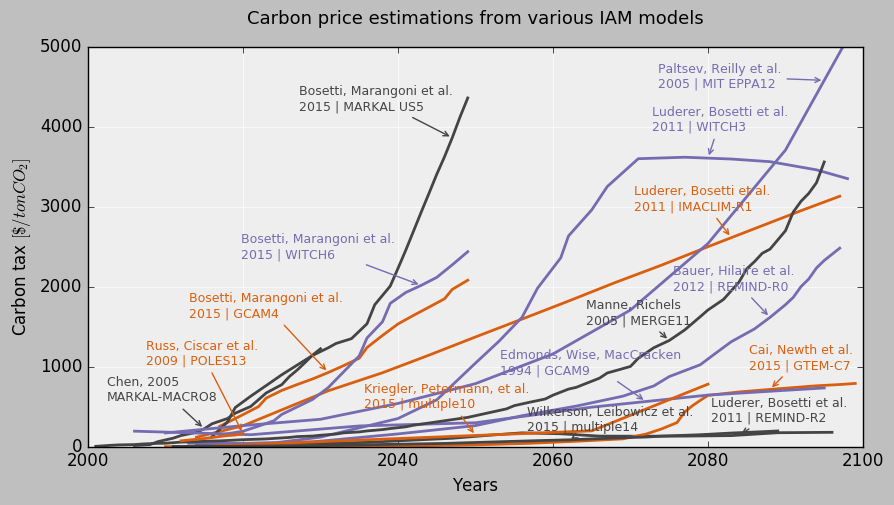

In [8]:
fig, ax = plt.subplots(1,1,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(10,5))
lw=2

colors=["#756bb1","#d95f0e","#444444"]

ax.grid(color='white', linestyle='solid')
ax.set_xlabel('Years')
ax.set_ylabel('Carbon tax $[\$/tonCO_2]$')
ax.set_xlim([2000,2100])
ax.set_ylim([0,5000])
#ax.set_yscale('log')
ax.set_title('Carbon price estimations from various IAM models',size=13,y=1.04)

loc=[2088,2083,2084,2080,2031,2047,2043,2088,2015,2072,2050,2075,2095,2020,2062]
lz=[(-70, 20),(-70, 20),(-20, 10),(-40, 20),(-100, 40),(-110, 20),(-130, 20),(-15, 15),\
    (-70, 20),(-105, 20),(-80, 20),(-60, 12),(-120, -5),(-70, 50),(-30, 7)]

for z in range(len(d))[:15]:
    #ax.scatter(d[z][0],d[z][1])
    years=range(int(min(d[z][0]))+1,int(max(d[z][0]))+1)
    if (co2[z]==1):k=1
    else: k=44.0/12.0
    ax.plot(years,fd[z](years)*k,lw=lw,color=colors[z%3])
    ax.annotate(labels[z]+str(z), xy=(loc[z],fd[z]([loc[z]])*k),\
                    xycoords='data', 
                    xytext=lz[z], textcoords='offset points',fontsize=9, color=colors[z%3],
                    arrowprops=dict(arrowstyle="->",color=colors[z%3]))
    
#plt.savefig('ces9.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

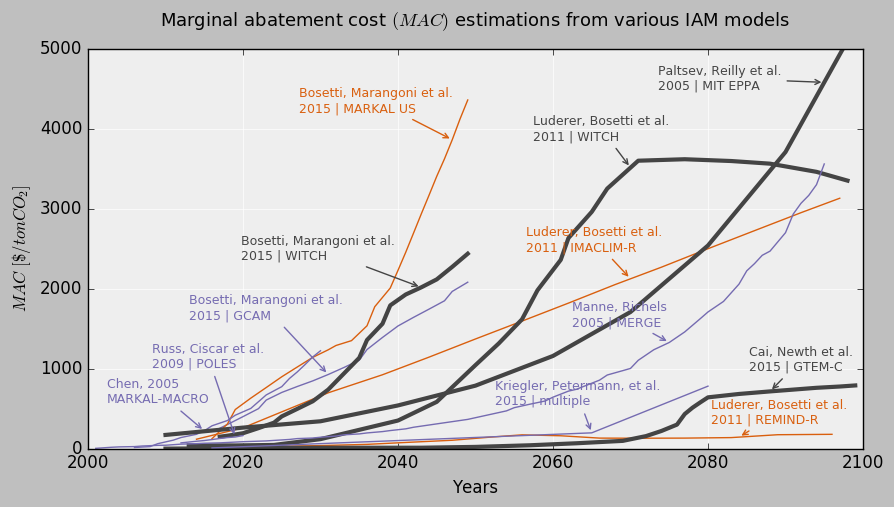

In [39]:
fig, ax = plt.subplots(1,1,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(10,5))
lw=2

colors=["#756bb1","#d95f0e","#444444"]

ax.grid(color='white', linestyle='solid')
ax.set_xlabel('Years')
ax.set_ylabel('$MAC$ $[\$/tonCO_2]$')
ax.set_xlim([2000,2100])
ax.set_ylim([0,5000])
#ax.set_yscale('log')
ax.set_title(u'Marginal abatement cost $(MAC)$ estimations from various IAM models',size=13,y=1.04)

loc=[2088,2070,2084,2070,2031,2047,2043,2088,2015,2072,2065,2075,2095,2019,2062]
lz=[(-60, 20),(-75, 20),(-20, 10),(-70, 20),(-100, 40),(-110, 20),(-130, 20),(-15, 15),\
    (-70, 20),(-90, 20),(-70, 20),(-70, 12),(-120, -5),(-60, 50),(-30, 7)]

for z in range(len(d))[:15]:
    #ax.scatter(d[z][0],d[z][1])
    if z not in {0,9,14}:
        years=range(int(min(d[z][0]))+1,int(max(d[z][0]))+1)
        if (co2[z]==1):k=1
        else: k=44.0/12.0
        if z in {3,6,7,12}:
            lw=3
            c=colors[2]
        elif z in {0,1,2,5}: 
            lw=1
            c=colors[1]
        else:
            lw=1
            c=colors[0]
        ax.plot(years,fd[z](years)*k,lw=lw,color=c)
        ax.annotate(labels[z], xy=(loc[z],fd[z]([loc[z]])*k),\
                    xycoords='data', 
                    xytext=lz[z], textcoords='offset points',fontsize=9, color=c,
                    arrowprops=dict(arrowstyle="->",color=c))
    
plt.savefig('ces9b.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

In [38]:
for z in range(len(d))[:15]:
    print labels[z]

Bauer, Hilaire et al.
2012 | REMIND-R
Luderer, Bosetti et al.
2011 | IMACLIM-R
Luderer, Bosetti et al.
2011 | REMIND-R
Luderer, Bosetti et al.
2011 | WITCH
Bosetti, Marangoni et al.
2015 | GCAM
Bosetti, Marangoni et al.
2015 | MARKAL US
Bosetti, Marangoni et al.
2015 | WITCH
Cai, Newth et al.
2015 | GTEM-C
Chen, 2005
MARKAL-MACRO
Edmonds, Wise, MacCracken
1994 | GCAM
Kriegler, Petermann, et al.
2015 | multiple
Manne, Richels
2005 | MERGE
Paltsev, Reilly et al.
2005 | MIT EPPA
Russ, Ciscar et al.
2009 | POLES
Wilkerson, Leibowicz et al.
2015 | multiple
